# OVERVIEW

This notebook imports results saved in `results/` and constructs figures and tables with results.

The resulting diagrams are exported to `output/`.

# PARAMETERS

In [19]:
##### CONFIGURATION

class CFG:
    
    # general
    seed  = 23
    cores = 4
    
    # data
    num_folds = 5
    use_fold  = 0
    
    # sample size
    sample_sets = 100
    max_sample  = 10000
    use_sample  = 1000
    
    # features
    feature_sets = 100
    max_features = 1645
    
    # paths
    data_path  = '../../data/'
    func_path  = '../../codes/'
    model_path = '../../models/'
    out_path   = '../../output/'
    res_path   = '../../results/'

In [20]:
##### CONVERT CONFIGURATION

CFG = dict(vars(CFG))
for key in ['__dict__', '__doc__', '__module__', '__weakref__']:
    del CFG[key]

# PREPARATIONS

In [21]:
##### PACKAGES

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline                        
import seaborn as sns

import os
import sys
import time
import datetime
import random
import multiprocessing
import pickle
from tqdm import tqdm

import gc
gc.enable()

import warnings

In [22]:
##### HELPER FUNCTIONS

sys.path.append(CFG['func_path'])
from seed_everything import seed_everything

In [23]:
##### SETTINGS

warnings.filterwarnings('ignore')          # suppress warnings
pd.set_option('display.max_columns', 100)  # max displayed columns 
seed_everything(CFG['seed'])               # randomness

- setting random seed to 23...


# IMPORT RESULTS

In [24]:
##### PARAMETER GRIDS

sample_grid = (np.linspace(start = 100, stop = CFG['max_sample'],   num = CFG['sample_sets'])).astype('int')
feats_grid  = (np.linspace(start = 10,  stop = CFG['max_features'], num = CFG['feature_sets'])).astype('int')

In [25]:
##### LOAD RESULTS

# sample size results
aucs_sample_transfer = np.load(CFG['res_path'] + 'aucs_finetuned_sample_fold{}.npy'.format(CFG['use_fold']))
aucs_sample_scratch  = np.load(CFG['res_path'] + 'aucs_scratch_sample_fold{}.npy'.format(CFG['use_fold']))

# features 1 results
aucs_feats1_transfer   = np.load(CFG['res_path'] + 'aucs_finetuned_feats1_fold{}.npy'.format(CFG['use_fold']))
aucs_feats1_scratch    = np.load(CFG['res_path'] + 'aucs_scratch_feats1_fold{}.npy'.format(CFG['use_fold']))
aucs_feats1_pretrained = np.load(CFG['res_path'] + 'aucs_pretrained_feats1_fold{}.npy'.format(CFG['use_fold']))

# features 2 results
aucs_feats2_transfer   = np.load(CFG['res_path'] + 'aucs_finetuned_feats2_fold{}.npy'.format(CFG['use_fold']))
aucs_feats2_scratch    = np.load(CFG['res_path'] + 'aucs_scratch_sample_fold{}.npy'.format(CFG['use_fold']))
aucs_feats2_pretrained = np.load(CFG['res_path'] + 'aucs_pretrained_feats2_fold{}.npy'.format(CFG['use_fold']))

In [26]:
##### CALCULATE RATIOS

aucs_feats1_ratio = (aucs_feats1_scratch    - 0.5) / (aucs_feats1_scratch[-1]    - 0.5)
aucs_feats2_ratio = (aucs_feats2_pretrained - 0.5) / (aucs_feats2_pretrained[-1] - 0.5)

# CREATE PLOTS

## SAMPLE SIZE

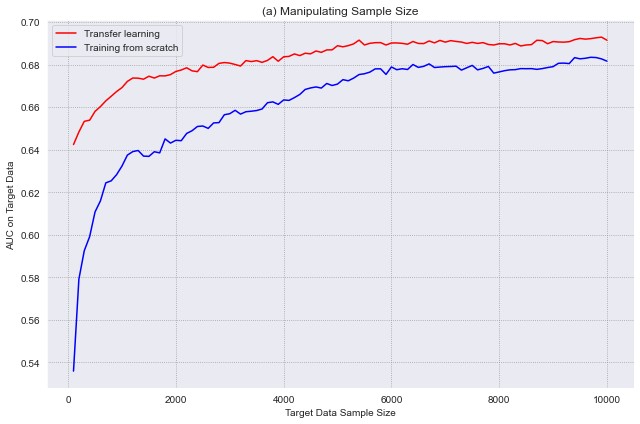

In [27]:
##### SAMPLE SIZE

fig = plt.figure(figsize = (9, 6))
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.lineplot(y = aucs_sample_transfer, x = sample_grid, color = 'red',  label = 'Transfer learning')
sns.lineplot(y = aucs_sample_scratch,  x = sample_grid, color = 'blue', label = 'Training from scratch')
plt.xlabel('Target Data Sample Size')
plt.ylabel('AUC on Target Data')
plt.title('(a) Manipulating Sample Size')
plt.legend()
plt.savefig(CFG['out_path'] + 'fig_sample_size_auc.pdf')
plt.tight_layout()
plt.show()

## INTERSECTING FEATURES

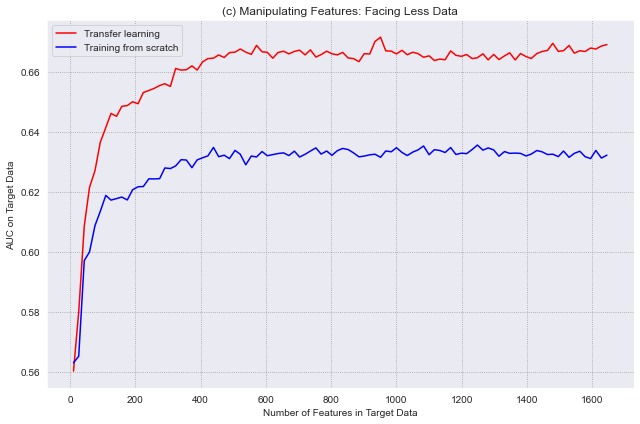

In [29]:
##### FEATURES: SETUP 1; AUC

fig = plt.figure(figsize = (9, 6))
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.lineplot(y = aucs_feats1_transfer, x = feats_grid, color = 'red',  label = 'Transfer learning')
sns.lineplot(y = aucs_feats1_scratch,  x = feats_grid, color = 'blue', label = 'Training from scratch')
plt.xlabel('Number of Features in Target Data')
plt.ylabel('AUC on Target Data')
plt.title('(c) Manipulating Features: Facing Less Data')
plt.legend()
plt.savefig(CFG['out_path'] + 'fig_features1_auc.pdf')
plt.tight_layout()
plt.show()

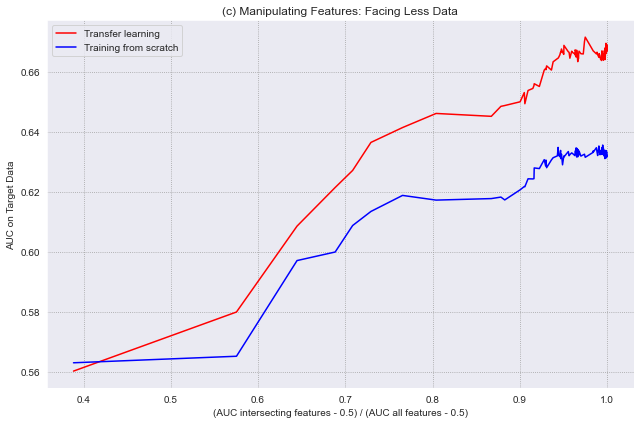

In [30]:
##### FEATURES: SETUP 1; AUC RATIO

fig = plt.figure(figsize = (9, 6))
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.lineplot(y = aucs_feats1_transfer, x = aucs_feats2_ratio, color = 'red',  label = 'Transfer learning')
sns.lineplot(y = aucs_feats1_scratch,  x = aucs_feats2_ratio, color = 'blue', label = 'Training from scratch')
plt.xlabel('(AUC intersecting features - 0.5) / (AUC all features - 0.5)')
plt.ylabel('AUC on Target Data')
plt.title('(c) Manipulating Features: Facing Less Data')
plt.legend()
plt.savefig(CFG['out_path'] + 'fig_features1_ratio.pdf')
plt.tight_layout()
plt.show()

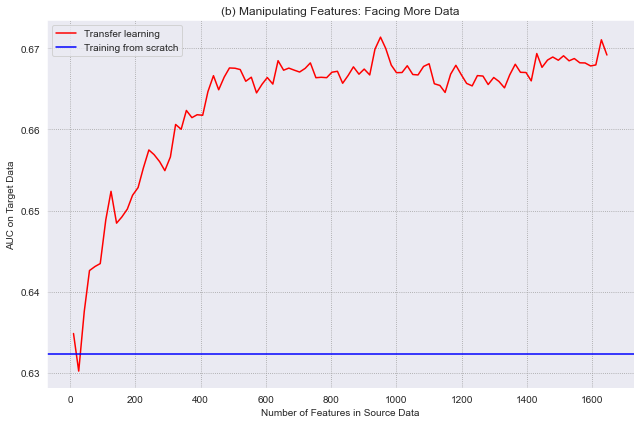

In [31]:
##### FEATURES: SETUP 2; AUC

fig = plt.figure(figsize = (9, 6))
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.lineplot(y = aucs_feats2_transfer, x = feats_grid, color = 'red',  label = 'Transfer learning')
plt.axhline(y = aucs_feats2_scratch[np.where(sample_grid == CFG['use_sample'])], color = 'blue', label = 'Training from scratch')
plt.xlabel('Number of Features in Source Data')
plt.ylabel('AUC on Target Data')
plt.title('(b) Manipulating Features: Facing More Data')
plt.legend()
plt.savefig(CFG['out_path'] + 'fig_features1_auc.pdf')
plt.tight_layout()
plt.show()

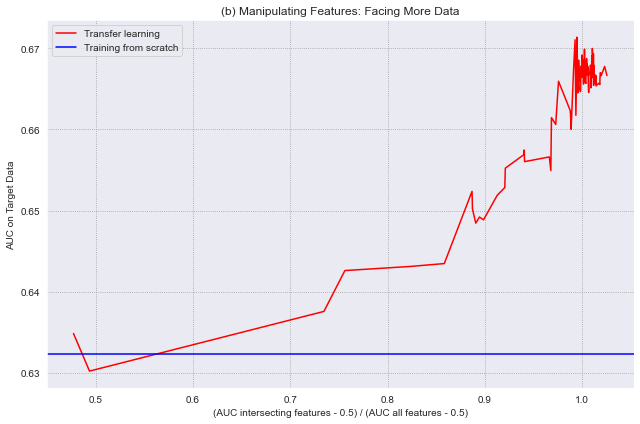

In [32]:
##### FEATURES: SETUP 2; AUC RATIO

fig = plt.figure(figsize = (9, 6))
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.lineplot(y = aucs_feats2_transfer, x = aucs_feats1_ratio, color = 'red',  label = 'Transfer learning')
plt.axhline(y = aucs_feats2_scratch[np.where(sample_grid ==  CFG['use_sample'])], color = 'blue', label = 'Training from scratch')
plt.xlabel('(AUC intersecting features - 0.5) / (AUC all features - 0.5)')
plt.ylabel('AUC on Target Data')
plt.title('(b) Manipulating Features: Facing More Data')
plt.legend()
plt.savefig(CFG['out_path'] + 'fig_features1_rario.pdf')
plt.tight_layout()
plt.show()